# Математическая статистика
## Практическое задание 1

В данном задании рассматриваются различные способы генерации выборки из некоторых стандартных распределений, а так же рассматриваются некоторые свойства эмпирической функции распределения и ядерной оценки плотности.

**Правила:**

* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25%, то все задание оценивается в 0 баллов.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 1"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 13 баллов
* Задача 2 - 3 балла
* Задача 3 - 5 баллов
* Задача 4 - 3 балла
* Задача 5 - 2 балла
* Задача 6 - 1 балл
* Задача 7 - 3 балла

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Имеется симметричная монета. С ее помощью напишите функцию генерации выборки из многомерного нормального распределения с заданными параметрами.

*Часть 1.* Напишите сначала функцию генерации равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Для получения максимального балла реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы.

In [3]:
coin = sps.bernoulli(0.5).rvs  # симметричная монета
# coin(size=10) --- реализация 10 бросков монеты

def uniform(size, precision):
    return (coin(size + (precision, )) * ((1/2) ** np.arange(1, precision + 1))).sum(axis = -1) 

Для $U[0, 1]$ сгенерируйте выборку и постройте график плотности.

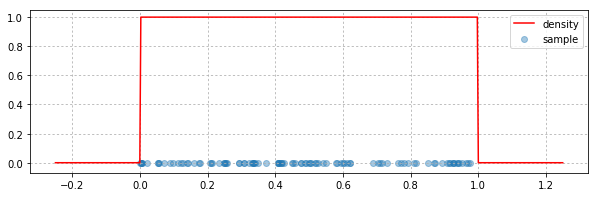

In [4]:
size = 100
grid = np.linspace(-0.25, 1.25, 500)
plt.figure(figsize=(10, 3))
plt.scatter(uniform((size, ), 50),np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, sps.uniform.pdf(grid), color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняется выборка в зависимости от precision.

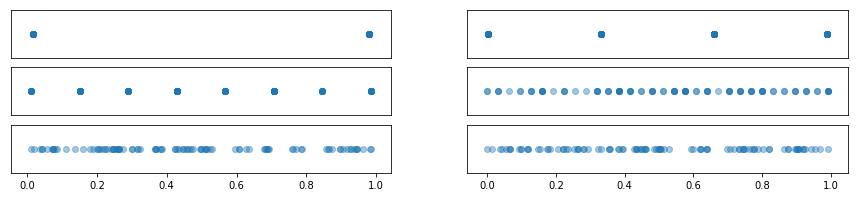

In [5]:
size = 100
plt.figure(figsize=(15, 3))
for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(uniform((size, ), precision), np.zeros(size), alpha=0.4)
    plt.yticks([])
    if i < 4: plt.xticks([])
plt.show()

**Вывод:**

Мы научились генерировать равномерное распределение с помощью распределения $Bern(1/2)$. Построили график плотности этого распределения и, как мы можем заметить, он ведет себя очень похоже на график равномерного распределения, следовательно, наше распределение сгенерировано правильно. Чем выше точность генерации выборки, тем ближе наш график к графику равномерного распределения.

*Часть 2.* Напишите функцию генерации выборки размера `size` (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера (задача 7.12 из книги по теории вероятностей).

Для получения полного балла реализация должна быть без циклов.

In [6]:
import math

def normal(size, loc, scale, precision):
    return scale*np.sin(2*math.pi*uniform(size, precision))*np.sqrt((-2*np.log(0.00000000001+uniform(size, precision)))) + loc

Для $\mathcal{N}(0, 1)$ сгенерируйте выборку и постройте график плотности этого распределения на отрезке $[-3, 3]$.

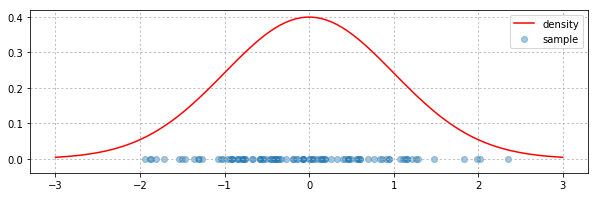

In [7]:
size = 100
grid = np.linspace(-3, 3, 100)
plt.figure(figsize=(10, 3))
plt.scatter(normal((size, ), 0, 1, 50),
np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Пусть $P$ --- некоторое распределение на $(\mathbb{R}, \mathscr{B}(\mathbb{R}))$. Числа $a$ и $\sigma$ называются параметрами сдвига и масштаба соответственно для семейства распределений $\left\{P_{a,\sigma}\ \left|\ a \in \mathbb{R}, \sigma \in \mathbb{R}_+\right.\right\}$, где $P_{a,\sigma}(B) = P\left(\frac{B-a}{\sigma}\right)$ и $\frac{B-a}{\sigma} = \left\{\left. \frac{x-a}{\sigma}\ \right|\ x \in B \right\}$

**Вопрос:** Найдите плотность $P_{a,\sigma}$, если $P$ имеет плотность $p(x)$.

**Ответ:** Из определения функции распределения получаем, что:
$F_{a,\sigma}(x) = P_{a,\sigma}((-\infty, x]) = P((-\infty, \frac{x-a}{\sigma}]) = F(\frac{x-a}{\sigma})$
Мы знаем, что $p(x) = F'(x)$. Следовательно, $p_{a,\sigma}(x) = F'(\frac{x-a}{\sigma}) = \frac{1}{\sigma}p(\frac{x-a}{\sigma})$.

**Вопрос:** Пусть $P$ --- стандартное нормальное распределение. Выпишите параметрическое семейство распределений, параметризованное параметрами сдвига и масштаба по отношению к распределению $P$. Какая связь между параметрами и характеристиками распределения (например, математическое ожидание)?

Параметр сдвига $a$ является математическим ожиданием, а масштаб $\sigma$ - дисперсией нормального распределения.

Постройте на одном графике разными цветами плотности стандартного нормального распределения, а так же для параметров $a=3, \sigma=1$ и $a=0, \sigma=2$. Интеравл по оси икс $[-7, 7]$.

Ниже графика теми же цветами изобразите также точку $a$ и $3\sigma$-интервал, используя шаблон, приведенный ниже.

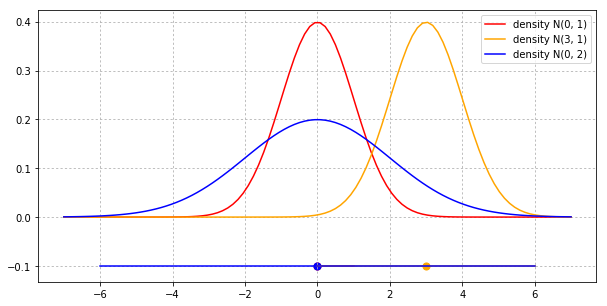

In [9]:
plt.figure(figsize=(10, 5))
grid = np.linspace(-7, 7, 100)
plt.plot(grid, sps.norm.pdf(grid, 0, 1), color='red', label='density N(0, 1)')
plt.plot([0, 1], [-0.1, -0.1], color='red')
plt.scatter(0, -0.1, color='red', s=50)

plt.plot(grid, sps.norm.pdf(grid, 3, 1), color='orange', label='density N(3, 1)')
plt.plot([0, 6], [-0.1, -0.1], color='orange')
plt.scatter(3, -0.1, color='orange', s=50)

plt.plot(grid, sps.norm.pdf(grid, 0, 2), color='blue', label='density N(0, 2)')
plt.plot([-6, 6], [-0.1, -0.1], color='blue')
plt.scatter(0, -0.1, color='blue', s=50)

plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:**

Мы научились с помощью преобразования Бокса-Мюллера генерировать нормальное распределение с параметрами по стандартному нормальному распределению. Построив графики нормальных распределений с различными параметрами, мы заметили, что от математического ожидания(параметра $a$) зависит сдвиг графика по оси $X$, а от дисперсии(параметра $\sigma$) зависит масштаб графика нормального распределения с параметрами.

*Часть 3.* Теперь напишите функцию генерации выборки из многомерного нормального распределения с заданным вектором средних `mean` и матрицей ковариаций `cov_matrix`. Помочь в этом может теорема об эквивалентных определениях гауссовского вектора. Для извлечения квадратного корня из матрицы может пригодится следующая функция, которая вычисляет собственные значения и векторы матрицы.

In [ ]:
from scipy.linalg import eigh

На этот раз достаточно, чтобы функция корректно работала в случае, когда `size` является числом.

In [10]:
import math
from scipy.linalg import eigh

def get_matrix(cov_matrix):
    eigenvalues, matrix_of_eigenvectors = eigh(cov_matrix)
    matrix_of_eigenvectors = matrix_of_eigenvectors.T
    diag_matrix = matrix_of_eigenvectors.T @ cov_matrix @ matrix_of_eigenvectors
    normalized_matrix = np.diag(1/np.sqrt(np.diag(diag_matrix)))
    return np.linalg.inv(matrix_of_eigenvectors @ normalized_matrix)

def gauss(mean, cov_matrix, size, precision=30):
    # Преобразование типов
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    # Проверка на корректность входа
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    A = get_matrix(cov_matrix) #Т.к. матрица ковариаций есть A*A.T, то по ней восстановим матрицу A
    rand_vector_size = A[1].size #Размер случайного нормального вектора
    n = normal((1, rand_vector_size, size), 0, 1, 10).T #Получили size стандартных нормальных векторов размера rand_vector_size
    #Исходя из эквивалентных определений гауссовских векторов,
    #получим формулу e = A * n + mean, где е имеет многомерное нормальное распределение, n - стандартное нормальное распределение
    return (A @ n).reshape(size, rand_vector_size) + mean


Сгенерируйте выборку размера `size` из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$.
Нанесите точки выборки на график и отметьте цветом значение плотности.

В инструкциях по Питону плотность вычислялась с помощью неэффективного кода. Подумайте, как можно написать эффективный короткий код, не использующий циклы.

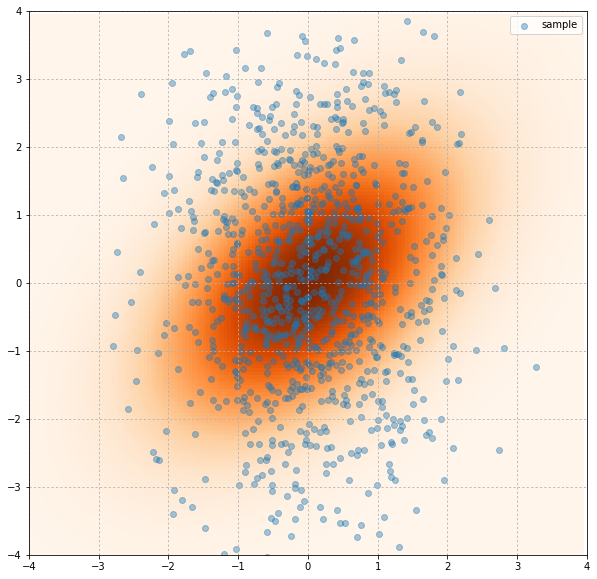

In [11]:
def get_multinormal_pdf(sample, mean, cov_matrix):
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    x = sample - mean
    const = (1/(((2 * math.pi)**(cov_matrix[1].size/2))*np.sqrt(np.linalg.det(cov_matrix))))
    return const * np.exp(np.vsplit(x.T, mean.size) @ np.linalg.inv(cov_matrix)  @ np.hsplit(x, mean.size) * (-0.5))
    
size = 1000
mean = (0, 0)
cov_matrix = [[2, 1], [1, 2]]
sample = gauss(mean, cov_matrix, size) # Генерация выборки
grid = np.mgrid[-4:4:0.05, -4:4:0.05]
# Вычисление плотности
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=[0, 0], cov=[[2, 1], [1, 2]])
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[0].shape[1])])

plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='sample')
plt.legend()
plt.grid(ls=':')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()

**Вывод:**

Мы научились генерировать многомерное нормальное распределение по одномерному нормальному распределению, вектору мат. ожиданий и матрице ковариаций, реализовав соответствующий алгоритм. Научились писать эффективный код для вычисления плотности многомерного нормального распределения. Построенный нами график ведет себя аналогично графику многомерного нормального распределения, ис чего следует корректность реализованного нами алгоритма.

**Задача 2.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя результат задачи 6.9 из книги по теории вероятностей.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [12]:
def expon(size, lambd, precision):
    return -1/lambd * np.log(1 - uniform(size, precision))

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

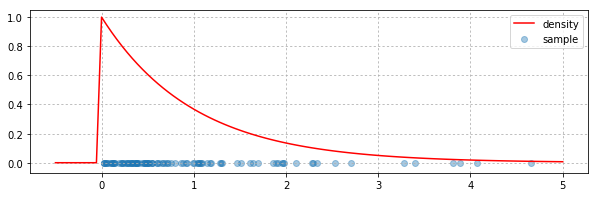

In [13]:
size = 100
grid = np.linspace(-0.5, 5, 100)
plt.figure(figsize=(10, 3))
plt.scatter(expon((size, ), 1, 50),
np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, sps.expon.pdf(grid), color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:**

Мы научились по равномерному распределению генерировать экспоненциальное распределение. Построенный нами график плотноти показывает, что полученная нами выборка действительно является экспоненциальным распределением.

**Задача 3.** Для каждого распределения постройте эмпирическую функцию распределения (ЭФР), гистограмму и ядерную оценку плотности. Сделать это помогут следующие функции.

In [14]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

*1. Бернуллиевское.*

Тут приведен пример построения ЭФР, просто запустите эту ячейку.

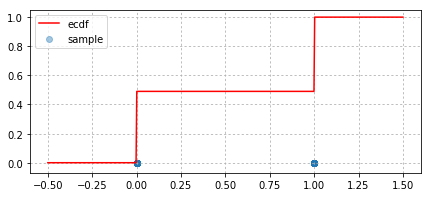

In [15]:
sample = coin(size=100)
ecdf = ECDF(sample)
grid = np.linspace(-0.5, 1.5, 500)

plt.figure(figsize=(7, 3))
plt.scatter(sample, np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, ecdf(grid), color='red', label='ecdf')
plt.legend()
plt.grid(ls=':')
plt.show()

Далее, чтобы не копировать несколько раз один и тот же код, напишем некоторую функцию.

В третьей функции нужно построить ядерную оценку плотности, о которой будет рассказано на лекциях. В частности, формула была на презентации на первой лекции. Пример построения можно посмотреть тут http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.nonparametric.kde.KDEUnivariate.html

In [17]:
def draw_ecdf(sample, grid, cdf=None):
    ''' По сетке grid cтроит графики эмпирической функции распределения
    и истинной (если она задана) для всей выборки и для 1/10 ее части.
    '''
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        plt.scatter(sample[0:size], np.zeros(size), alpha=0.4, label='sample')
        if cdf is not None:
            plt.plot(grid, cdf(grid),
                     color='green', alpha=0.3, lw=2, label='true cdf')
        ecdf = ECDF(sample[0:size])
        plt.plot(grid, ecdf(grid), color='red', label='ecdf')
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

    
def draw_hist(sample, grid, pdf=None):
    ''' Строит гистограмму и по сетке grid график истинной плотности
    (если она задана) для всей выборки и для 1/10 ее части.
    '''
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        plt.hist(sample[0:size], bins=20,
        range=(grid.min(), grid.max()),
        normed=True)
        if pdf is not None:
            plt.plot(grid, pdf(grid),
            color='green', alpha=0.3, lw=2)
    plt.show()
    
def draw_pdf(sample, grid, pdf=None):
    ''' По сетке grid cтроит графики ядерной оценки плотности
    и истинной плотности (если она задана) для всей выборки и для 1/10 ее части.
    '''
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        kernel_density = KDEUnivariate(sample)
        kernel_density.fit()
        plt.scatter(sample[0:size], np.zeros(size), alpha=0.4, label='sample')
        if pdf is not None:
            plt.plot(grid,
            pdf(grid),
            color='green', alpha=0.3, lw=2, label='true pdf')
        plt.plot(grid, kernel_density.evaluate(grid),
        color='red', label='kde')
        plt.legend()
        plt.grid(ls=':')
    plt.show()

Теперь примените реализованные выше функции к выборкам размера 500 из распределений $U[0, 1]$, $\mathcal{N}(0, 1)$ и $Exp(1)$. Графики (ф.р., плотностей) стройте на интервалах $(-0.2, 1.2)$, $(-3, 3)$ и $(-0.5, 5)$ соответственно.

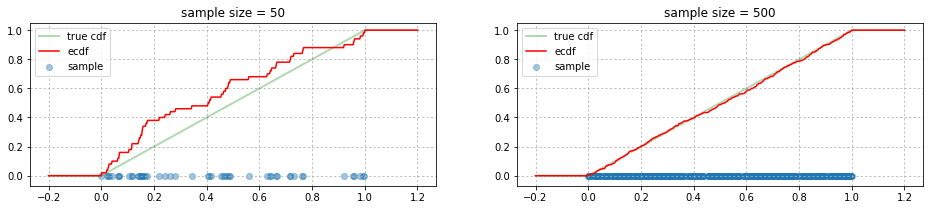

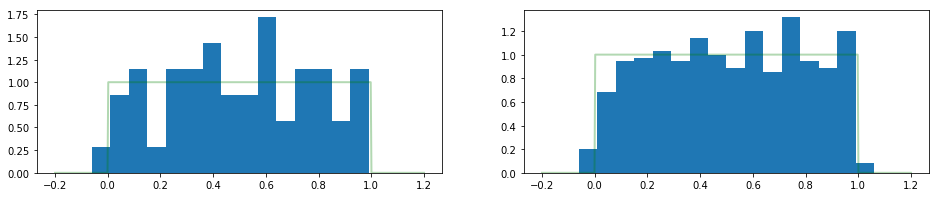

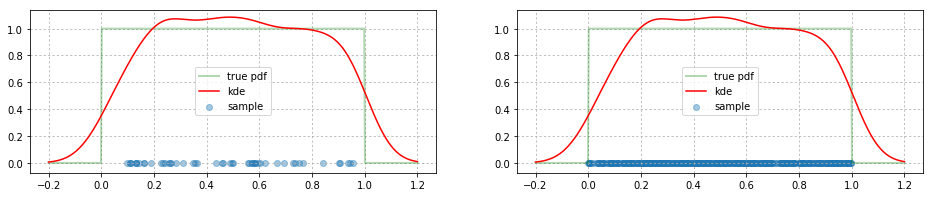

In [18]:
draw_ecdf(sps.uniform.rvs(size=500, loc=0, scale=1), np.linspace(-0.2, 1.2, 500), sps.uniform(loc=0, scale=1).cdf)
draw_hist(sps.uniform.rvs(size=500, loc=0, scale=1), np.linspace(-0.2, 1.2, 500), sps.uniform(loc=0, scale=1).pdf)
draw_pdf(sps.uniform.rvs(size=500, loc=0, scale=1), np.linspace(-0.2, 1.2, 500), sps.uniform(loc=0, scale=1).pdf)

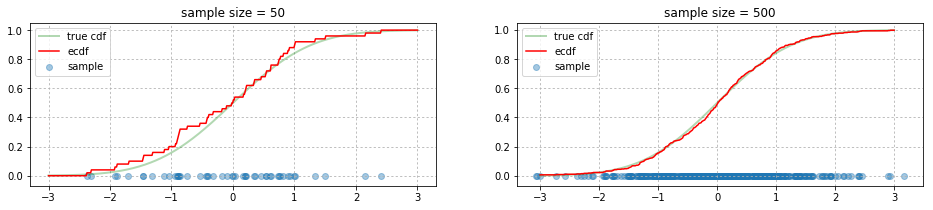

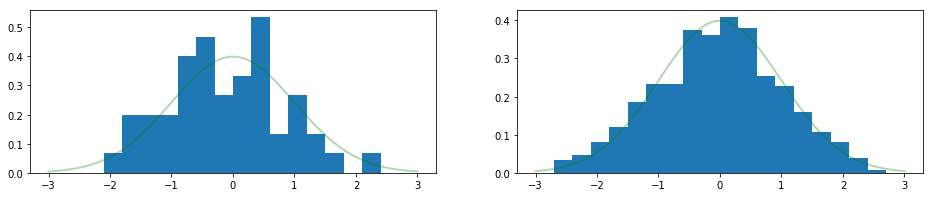

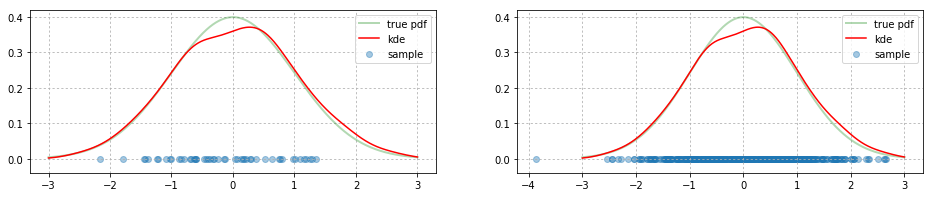

In [19]:
draw_ecdf(sps.norm.rvs(size=500, loc=0, scale=1), np.linspace(-3, 3, 500), sps.norm(loc=0, scale=1).cdf)
draw_hist(sps.norm.rvs(size=500, loc=0, scale=1), np.linspace(-3, 3, 500), sps.norm(loc=0, scale=1).pdf)
draw_pdf(sps.norm.rvs(size=500, loc=0, scale=1), np.linspace(-3, 3, 500), sps.norm(loc=0, scale=1).pdf)

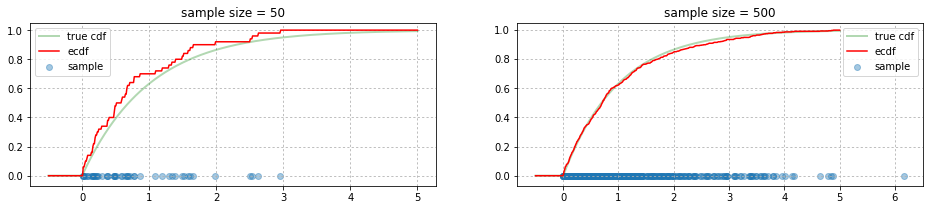

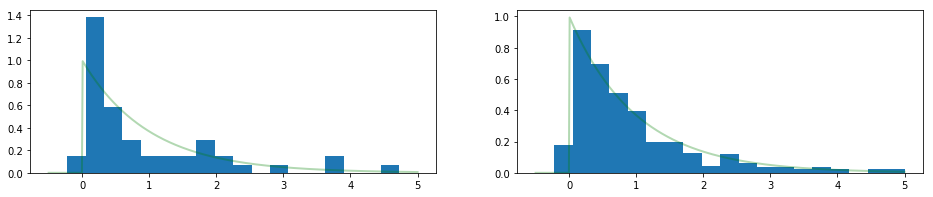

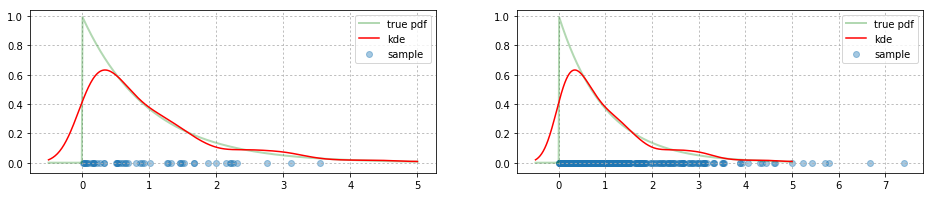

In [20]:
draw_ecdf(sps.expon.rvs(size=500, loc=0, scale=1), np.linspace(-0.5, 5, 500), sps.expon(loc=0, scale=1).cdf)
draw_hist(sps.expon.rvs(size=500, loc=0, scale=1), np.linspace(-0.5, 5, 500), sps.expon(loc=0, scale=1).pdf)
draw_pdf(sps.expon.rvs(size=500, loc=0, scale=1), np.linspace(-0.5, 5, 500), sps.expon(loc=0, scale=1).pdf)

**Вывод:**

Мы научились для каждого распределения строить эмпирическую функцию распределения(ЭФР), гистограмму и ядерную оценку плотности. Графики схожи с графиками соответствующих им плотностей из чего следует, что все наши вычисления произведены верно. Так мы можем заметить, что чем больше размер выборки, тем точнее строятся графики.

**Задача 4.** Сгенерируйте выборку $X_1, ..., X_{10000}$ из стандартного нормального распределения. Для каждого $n \leqslant 10000$ постройте эмпирическую функцию распределения $F^*_n$ и посчитайте **точное** значение статистики $$D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|.$$
Постройте график зависимости статистики $D_n$ от $n$. Верно ли, что $D_n \to 0$ и в каком смысле? Не забудьте сделать вывод.

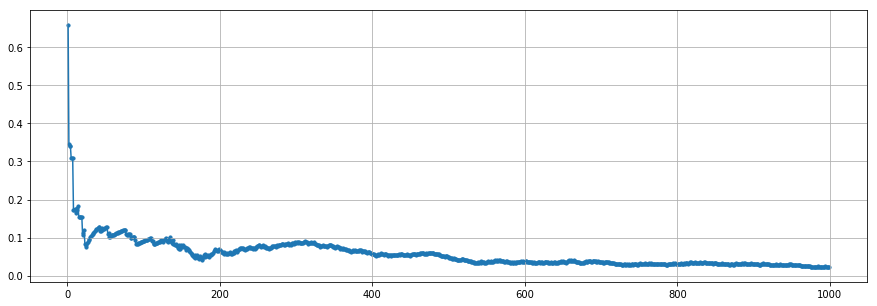

In [21]:
sample = sps.norm.rvs(size=1000, loc=0, scale=1)
cdf = sps.norm(loc=0, scale=1).cdf
res = []
for i in range(1, 1000):
    ecdf = ECDF(sample[0:i])
    a = np.max(np.absolute(ecdf(sample[0:i]) - cdf(sample[0:i])))
    a = max(a, cdf(sorted(sample[0:i])[0]))
    if (i > 1):
        b = np.max(np.absolute(ecdf(sorted(sample[0:i-1])) - cdf(sorted(sample[1:i]))))
    else:
        b = 0
    res.append(max(a, b))
    
plt.figure(figsize=(15, 5))
plt.scatter(np.arange(1, 1000), res, s = 10, label='S') 
plt.plot(np.arange(1, 1000), res)
plt.grid() 
plt.show()

По теореме Гливенко-Кантелли последовательность $D_n$ почти наверное сходится к нулю при $n->+\infty$.

**Вывод:**
    Мы научились считать точное значение статистики и строить график соответствующей функции. Видно, что график ведет себя согласно теореме Гливенко-Кантелли, из чего следует корректность реализованного нами алгоритма.

**Задача 5.** Исследуйте вид ядерной оценки плотности в зависимости от вида ядра и его ширины.

Для этого сгенерируйте выборку $X_1, ..., X_{200}$ из распределения $U[0, 1]$ и постройте серию графиков для различной ширины гауссовского ядра, а затем другую серию графиков для различных типов ядер при фиксированной ширине. На каждом графике на отрезке $[-0.2, 1.2]$ должны быть изображены истинная плотность (полупрозрачным цветом) и ее ядерная оценка, а так же с нулевой $y$-координатой должны быть нанесены точки выборки. Для экономии места стройте графики в два столбца.

 Не забудьте сделать вывод.

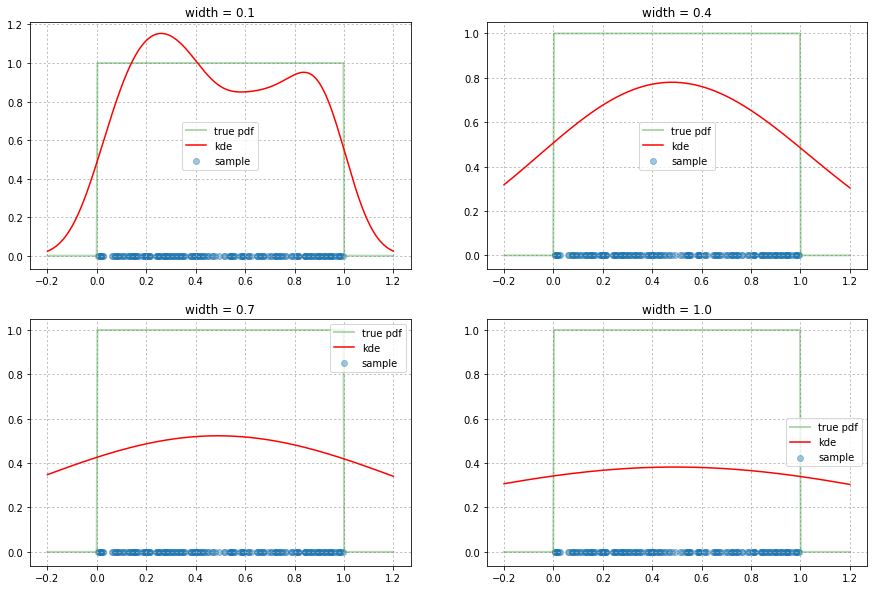

In [22]:
sample = sps.uniform.rvs(size=200, loc=0, scale=1)
kde = KDEUnivariate(sample)
size=200
plt.figure(figsize=(15, 10))
k = 0
for i in np.linspace(0.1, 1, 4):
    k+=1
    plt.subplot(2, 2, k)
    plt.title('width = {}'.format(i))
    kde.fit(bw=i)
    plt.scatter(sample[0:size], np.zeros(size), alpha=0.4, label='sample')
    grid = np.linspace(-0.2, 1.2, 500)
    plt.plot(grid, sps.uniform(loc=0, scale=1).pdf(grid), color='green', alpha=0.3, lw=2, label='true pdf')
    plt.plot(grid, kde.evaluate(grid), color='red', label='kde')
    plt.legend()
    plt.grid(ls=':')
plt.show()

Построим графики для различных типов ядер фиксированной ширины = 0.4

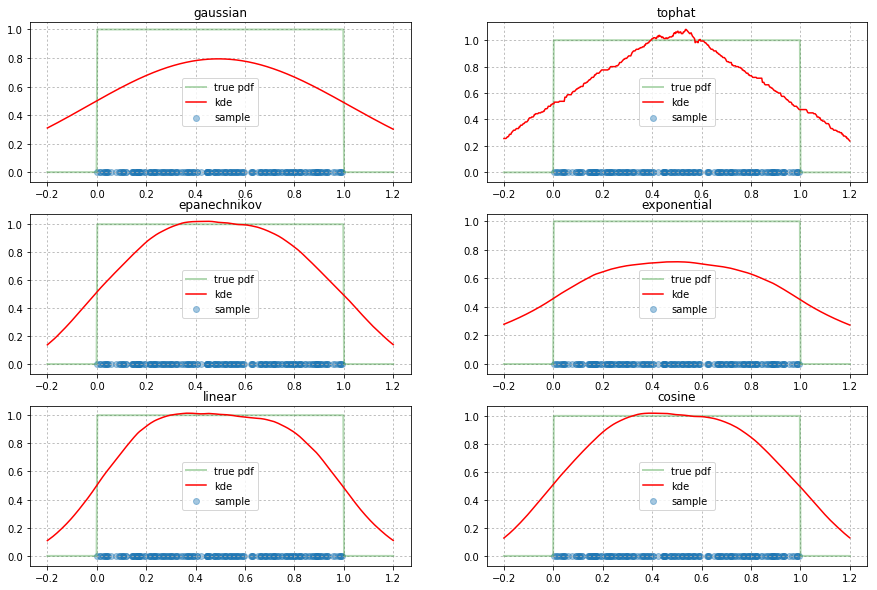

In [25]:
from sklearn.neighbors import KernelDensity

sample = sps.uniform.rvs(size=200, loc=0, scale=1)[:, np.newaxis]

size=200
i = 1
plt.figure(figsize=(15, 10))
for name_kernel in ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']:
    plt.subplot(3, 2, i)
    i+=1
    plt.title('{}'.format(name_kernel))
    plt.scatter(sample[0:size], np.zeros(size), alpha=0.4, label='sample')
    grid = np.linspace(-0.2, 1.2, 500)[:, np.newaxis]
    plt.plot(grid, sps.uniform(loc=0, scale=1).pdf(grid), color='green', alpha=0.3, lw=2, label='true pdf')
    kde = KernelDensity(kernel=name_kernel, bandwidth=0.4).fit(sample)
    log_dens = kde.score_samples(grid)
    plt.plot(grid, np.exp(log_dens), color='red', label='kde')
    plt.legend()
    plt.grid(ls=':')
plt.show()

**Вывод:**

Мы научились строить графики для различной ширины гауссовского ядра и для различных типов ядер при фиксированной ширине. По построенным графикам видно, что чем больше ширина ядра, тем больше ядерная плотность отклоняется от истинной плотности. Так же мы можем заметить, что при некоторой фиксированной плотности, плотности ядер linear, cosine и epanechnikov больше всех остальных совпадают с истинной плотностью. 

**Задача 6.** В файле `countries.csv` дан список стран и территорий с указанием их площади. Нанести значения площади на график и постройте эмпирическую функцию распределения и ядерную оценку плотности. Поскольку некоторые страны слишком большие, ограничьте график по оси икс.  Не забудьте сделать вывод.

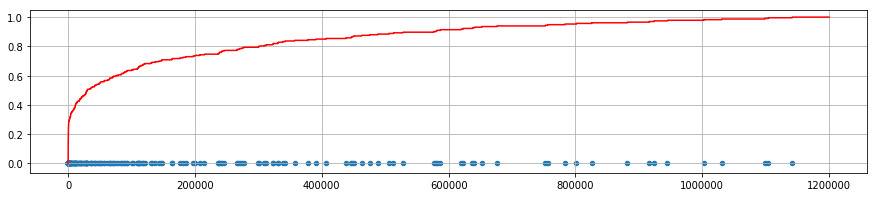

In [26]:
f = open('countries.csv', 'r')
square = []
size = 0
for line in f.readlines():
    tmp = line.split()
    square.append(float(tmp[-1]))
    size+=1
f.close()

square = np.array(square)
square = square[25:]
size-=25
plt.figure(figsize=(15, 3))
plt.scatter(square, np.zeros(size), s = 20, label='S') 

ecdf = ECDF(square)
grid = np.linspace(0, 1200000, 2000000)
plt.plot(grid, ecdf(grid), color='red', label='ecdf')

plt.grid() 
plt.show()

**Задача 7.** Проведите небольшое исследование. Выберите случайных $n$ человек в социальной сети. Вы можете выбирать их случайно из всех зарегистрированных в этой социальной сети, либо по какому-то *одному* критерию (укажите его). Составьте выборку $X_1, ..., X_n$, где $X_i$ --- количество друзей у $i$-го человека. Постройте по этой выборке эмпирическую функцию распределения. Можете ли вы сказать, какому закону подчиняется распределение количества друзей?

Выборка должна быть из не менее 30 человек, ограничений сверху нет. Вы можете также написать программу, которая будет автоматически собирать данные.  Не забудьте сделать вывод.